# Exploring, filtering, grouping and viewing data in [pandas](https://pandas.pydata.org/)
Demonstration notebook, using UK Police data on street-level crime in the London Metropolitan region, from https://data.police.uk/


In [1]:
import pandas as pd
import seaborn as sns
#Set max row and max column for display in Jupyter Notebook
pd.set_option('display.max_row', 150)
pd.set_option('display.max_columns', 20)

In [2]:
# Set Seaborn styling parameters for plots
sns.set(rc={'figure.figsize':(15,10)}) # Set figure size for all plots
sns.set_context("notebook") # Set how plots are displayed

# Read and inspect data
The sample data here is Metropolitan Police cases recorded for Feb 2022, in CSV format. We use `read_csv()` to load the file.

In [3]:
# File path
file = r'data\2022-09-metropolitan-street.csv'
# Create dataframe (df)
df = pd.read_csv(file)

## Dimensions of the dataframe

In [4]:
# Size of the dataframe (count of rows and columns):
df.shape

(85828, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85828 entries, 0 to 85827
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crime ID               68416 non-null  object 
 1   Month                  85828 non-null  object 
 2   Reported by            85828 non-null  object 
 3   Falls within           85828 non-null  object 
 4   Longitude              83712 non-null  float64
 5   Latitude               83712 non-null  float64
 6   Location               85828 non-null  object 
 7   LSOA code              83712 non-null  object 
 8   LSOA name              83712 non-null  object 
 9   Crime type             85828 non-null  object 
 10  Last outcome category  68416 non-null  object 
 11  Context                0 non-null      float64
dtypes: float64(3), object(9)
memory usage: 7.9+ MB


In [35]:
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Borough
8,NaN,2022-09,Metropolitan Police Service,Metropolitan Police Service,0.138830,51.583433,On or near Thatches Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN,Barking and Dagenham
9,NaN,2022-09,Metropolitan Police Service,Metropolitan Police Service,0.140576,51.583419,On or near Rams Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN,Barking and Dagenham
10,NaN,2022-09,Metropolitan Police Service,Metropolitan Police Service,0.140194,51.582356,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN,Barking and Dagenham
11,NaN,2022-09,Metropolitan Police Service,Metropolitan Police Service,0.135924,51.587353,On or near Gibbfield Close,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN,Barking and Dagenham
12,0c7e2cca757761a4fc0a50df4f1044295aa117f358027c...,2022-09,Metropolitan Police Service,Metropolitan Police Service,0.140194,51.582356,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN,Barking and Dagenham


## Handling empty values with isna() and dropna()

In [6]:
# Summarise the empty values in df by column
df.isna().sum()

Crime ID                 17412
Month                        0
Reported by                  0
Falls within                 0
Longitude                 2116
Latitude                  2116
Location                     0
LSOA code                 2116
LSOA name                 2116
Crime type                   0
Last outcome category    17412
Context                  85828
dtype: int64

In [7]:
# Remove rows with empty values (NaN) in the 'LSOA name' column:
df = df.dropna(subset=['LSOA code'])

In [8]:
#Check if the NaN values have been dropped from df
df.isna().sum()

Crime ID                 17410
Month                        0
Reported by                  0
Falls within                 0
Longitude                    0
Latitude                     0
Location                     0
LSOA code                    0
LSOA name                    0
Crime type                   0
Last outcome category    17410
Context                  83712
dtype: int64

## Show head, tail or slice
`df.head()`, last rows:` df.tail()`. Show slice by index number: `df[:5]` (shows first five rows). 

For large dataframes, the name of the dataframe will display the head and tail, omitting the middle.

In [9]:
#Show a slice of the rows by index
df[:5]

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,dffa1420f0cd2370252db6f825b893c59f4692abf52615...,2022-09,Metropolitan Police Service,Metropolitan Police Service,-3.218870,54.952349,On or near Barwise Brow,E01019107,Allerdale 002B,Violence and sexual offences,Investigation complete; no suspect identified,NaN
1,a668b34f0f67e39940612e18734a5b81d10f6c0faba66e...,2022-09,Metropolitan Police Service,Metropolitan Police Service,-0.542010,50.808151,On or near New Road,E01031454,Arun 011C,Violence and sexual offences,Under investigation,NaN
2,3471e88b28218c7937ef6def587fbd6bbdcae722312950...,2022-09,Metropolitan Police Service,Metropolitan Police Service,-0.643865,50.799172,On or near Allin Way,E01031421,Arun 015E,Violence and sexual offences,Under investigation,NaN
3,62bfa4c7858fbd903f9d05404f5adc16429c05e63d0f0d...,2022-09,Metropolitan Police Service,Metropolitan Police Service,0.854243,51.143847,On or near Baileys Field,E01024028,Ashford 007F,Violence and sexual offences,Under investigation,NaN
4,526ad8fc7d82c6d8360e383cf046e3211cd1f104f19c52...,2022-09,Metropolitan Police Service,Metropolitan Police Service,-0.841911,51.827796,On or near Haines Close,E01017706,Aylesbury Vale 012B,Violence and sexual offences,Under investigation,NaN


## value_counts()
For categorical data, show the number of occurrences. In this case, number of incidents for each 'Crime type' category:

In [10]:
df['Crime type'].value_counts()

Violence and sexual offences    20179
Anti-social behaviour           17410
Other theft                      9550
Vehicle crime                    9168
Public order                     4496
Burglary                         4396
Criminal damage and arson        4175
Theft from the person            3446
Shoplifting                      3137
Drugs                            2841
Robbery                          2074
Bicycle theft                    1600
Other crime                       842
Possession of weapons             398
Name: Crime type, dtype: int64

# Selecting and filtering data

Select only columns containing categorical data ('object' type) with `select_dtypes()` and summarise with `describe()`

In [11]:
(df.select_dtypes(include=['object'])).describe()

,Crime ID,Month,Reported by,Falls within,Location,LSOA code,LSOA name,Crime type,Last outcome category
count,66302,83712,83712,83712,83712,83712,83712,83712,66302
unique,63037,1,1,1,21893,5097,5097,14,7
top,ac51e51d421256076850ed74e7bb82e38f47c06f350d07...,2022-09,Metropolitan Police Service,Metropolitan Police Service,On or near,E01033595,Westminster 013E,Violence and sexual offences,Under investigation
freq,11,83712,83712,83712,14030,692,692,20179,45597


## Add "Borough" column with string slice
Create a new column with the Borough name, so that we can select rows by borough. The `slice` function returns a defined segment of the text (or *string*) in the "LSOA name" column and copies it to a new column.

In [12]:
#Create a Borough-column:
df['Borough'] = df['LSOA name'].str.slice(0, -5)

## List unique values by column

In [13]:
df['Borough'].unique()

array(['Allerdale', 'Arun', 'Ashford', 'Aylesbury Vale', 'Babergh',
       'Barking and Dagenham', 'Barnet', 'Basildon',
       'Basingstoke and Deane', 'Bath and North East Somerset', 'Bexley',
       'Birmingham', 'Blackpool', 'Bolton', 'Boston', 'Bradford', 'Brent',
       'Brentwood', 'Brighton and Hove', 'Broadland', 'Bromley',
       'Bromsgrove', 'Broxbourne', 'Bury', 'Cambridge', 'Camden',
       'Canterbury', 'Cardiff', 'Carmarthenshire', 'Castle Point',
       'Central Bedfordshire', 'Chelmsford', 'Cheltenham', 'Cherwell',
       'Cheshire East', 'Chiltern', 'City of London', 'Colchester',
       'Cornwall', 'County Durham', 'Coventry', 'Crawley', 'Croydon',
       'Dacorum', 'Dartford', 'Derby', 'Dover', 'Dudley', 'Ealing',
       'Eastbourne', 'East Staffordshire', 'Elmbridge', 'Enfield',
       'Epping Forest', 'Epsom and Ewell', 'Exeter', 'Gravesham',
       'Great Yarmouth', 'Greenwich', 'Guildford', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harlow', 'Harr

Now that we know that the dataset includes incidents that took place outside of London, let's select only the London Boroughs in the dataset (just as we would use a filter in Excel).

## Select with contains()
Select with a keyword. Good for single-keyword filtering, or stringing conditions together with & or | ('or')

In [14]:
#Create separate dataframe for selected borough using part of the name
df_select = df[df['LSOA name'].str.contains('Hammersmith')]

In [15]:
df_select.shape

(2062, 13)

## Select London boroughs only, with isin()
Select rows using a list of values.

In [16]:
#List of London Boroughs, plus City of London
LB_list = ['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley','Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham','Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster']
# Filter the dataframe to include only names in the list:
df = df[df['Borough'].isin(LB_list)]

In [17]:
#Check which Boroughs are left in the df now:
df['Borough'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster'], dtype=object)

In [18]:
# Length of the resulting dataframe
len(df)

83340

# Group and aggregate
Functions: `groupby()`, `agg()`. Let's compare the boroughs by how many incidents are recorded for each.

## groupby()

### Grouping 1
Which borough has the most cases in total? We group the data by the "Borough" column, and sum up the total number of cases.

In [19]:
# Group by Borough, count total number of incidents, sort from highest to lowest
df_grouped = df.groupby(['Borough'])['Crime type'].agg('count').reset_index().sort_values(by=['Crime type'], ascending=False)

In [21]:
# Show first 10 rows of grouped dataframe
df_grouped[:10]

,Borough,Crime type
32,Westminster,6261
7,Croydon,3542
29,Tower Hamlets,3536
24,Newham,3436
5,Camden,3358
21,Lambeth,3333
27,Southwark,3193
3,Brent,3111
13,Haringey,3098
8,Ealing,3015


<AxesSubplot:xlabel='Crime type', ylabel='Borough'>

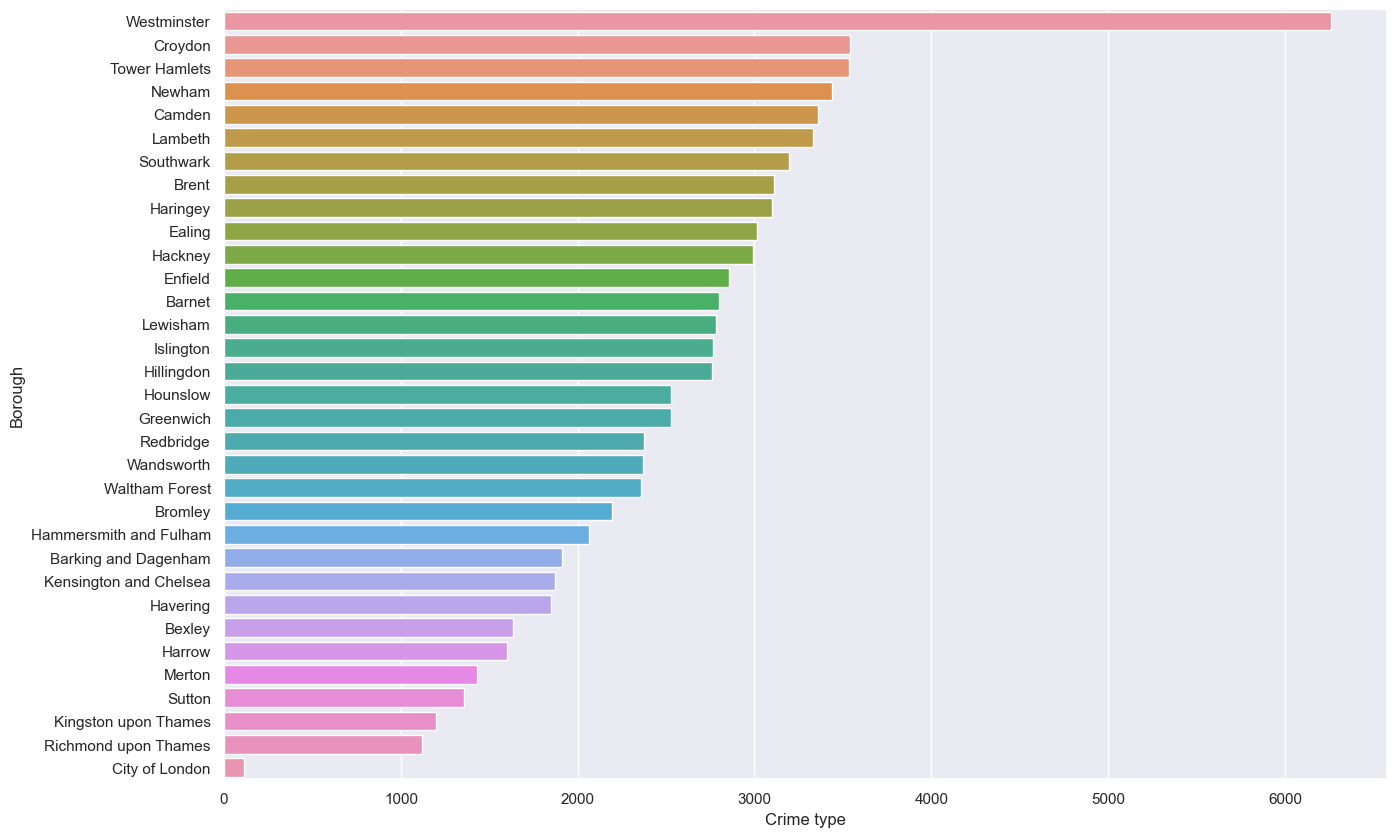

In [22]:
# Bar chart comparing total cases by borough, descending order
sns.barplot(data=df_grouped, x="Crime type", y="Borough")

### Grouping 2
Breakdown by crime type and borough.

In [23]:
# Another grouping, by crime type and borough, using "LSOA code" for counting the number of instances.
df_grouped2 = df.groupby(['Crime type', 'Borough'])['LSOA code'].agg('count').reset_index().sort_values(by=['Borough'], ascending=False)

In [24]:
df_grouped2[:10]

,Crime type,Borough,LSOA code
459,Violence and sexual offences,Westminster,882
393,Theft from the person,Westminster,923
131,Criminal damage and arson,Westminster,175
229,Other theft,Westminster,1545
164,Drugs,Westminster,244
360,Shoplifting,Westminster,290
32,Anti-social behaviour,Westminster,1016
65,Bicycle theft,Westminster,101
294,Public order,Westminster,286
98,Burglary,Westminster,279


In [26]:
# Here's a selected view of df_grouped2, showing bicycle thefts by borough (top 10 only)
(df_grouped2[df_grouped2['Crime type'].str.contains('bicycle', case=False)]).sort_values(by='LSOA code', ascending=False)[:10]

,Crime type,Borough,LSOA code
44,Bicycle theft,Hackney,127
60,Bicycle theft,Southwark,124
62,Bicycle theft,Tower Hamlets,111
45,Bicycle theft,Hammersmith and Fulham,106
65,Bicycle theft,Westminster,101
51,Bicycle theft,Islington,99
54,Bicycle theft,Lambeth,91
38,Bicycle theft,Camden,83
50,Bicycle theft,Hounslow,80
64,Bicycle theft,Wandsworth,72


## Crosstab
Compare data across categories with `crosstab()`. A a cross-tabulation table shows the frequency with which certain groups of data appear. 

The Practical Business Python blog has a good summary of Pandas' crosstab function: [Pandas Crosstab Explained](https://pbpython.com/pandas-crosstab.html)

### Simple crosstab
Crime types broken down by Borough. This creates a wide-format view of crime types (in separate columns) by borough, easier to read than the long- (or tidy) format of the original data.

In [27]:
df_crossed = pd.crosstab(df['Borough'], df['Crime type']).sort_values(by=['Borough'], ascending=True)

In [28]:
df_crossed

Crime type,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
Borough,,,,,,,,,,,,,,
Barking and Dagenham,382,13,103,105,82,21,165,7,95,31,40,26,265,575
Barnet,587,38,189,126,55,26,272,8,154,49,108,66,464,655
Bexley,310,4,58,125,62,20,152,12,90,29,56,14,207,498
Brent,691,30,168,146,102,24,267,22,191,78,131,68,334,859
Bromley,430,10,128,148,66,26,169,10,150,31,154,25,260,589
Camden,699,83,167,119,100,14,625,9,163,86,93,283,334,583
City of London,10,2,3,2,2,0,37,0,4,6,1,29,1,17
Croydon,708,22,198,200,151,28,304,11,200,122,112,58,449,979
Ealing,782,36,164,160,83,30,257,15,170,46,93,48,328,803


#### Heatmap of crosstab

<AxesSubplot:xlabel='Crime type', ylabel='Borough'>

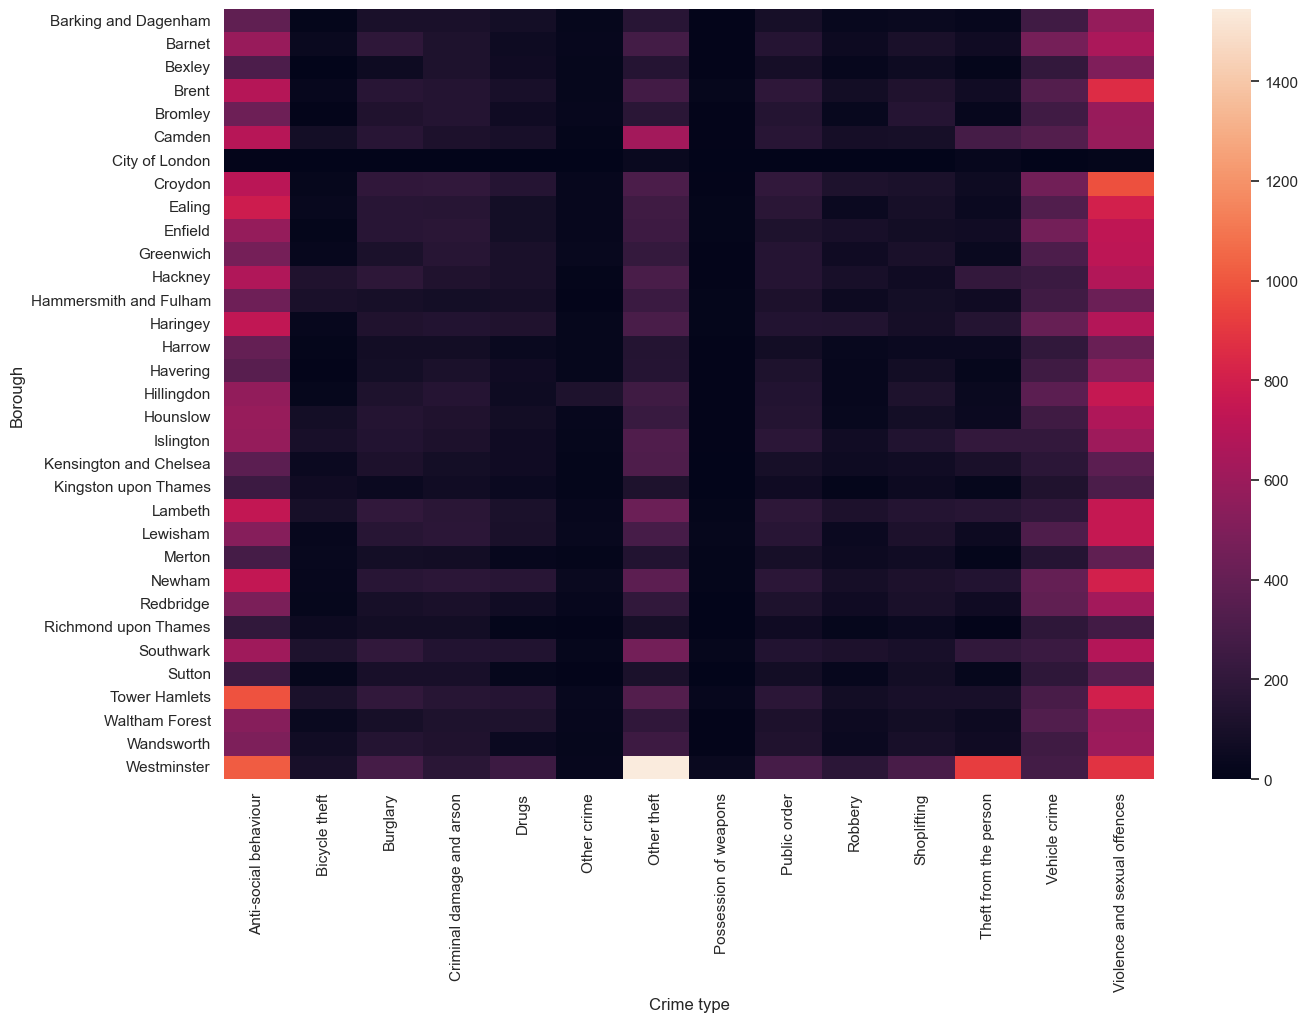

In [29]:
sns.heatmap(df_crossed)

**Task:** Would it make sense to show only specific columns? Which ones?

# Output
You can save a dataframe in various formats. The most-used methods for writing to file are `to_excel()` and `to_csv()`, and (more simply) copying to clipboard for pasting into Excel or similar software using `to_clipboard()`.

First, list your dataframes, using the `%who_ls` magic method.

In [ ]:
# List all the dataframes in the notebook
%who_ls DataFrame

## Copy to clipboard
The commonly used to_clipboard() method is good for copy/pasting small datasets into Excel (or other spreadsheet software) on the fly.

In [33]:
# Flatten the dataframe
df_crossed.reset_index(inplace=True)

In [34]:
# Copy to clipboard
df_crossed.to_clipboard(index=False)